## Credit Card Dataset Clustering

Dalam Notebook ini, saya akan membuat analisis Clustering dari pemakaian Kartu Kredit selama kurang lebih 6 bulan.

This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

CUSTID : Identification of Credit Card holder (Categorical)

BALANCE : Balance amount left in their account to make purchases (

BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONEOFFPURCHASES : Maximum purchase amount done in one-go

INSTALLMENTSPURCHASES : Amount of purchase done in installment

CASHADVANCE : Cash in advance given by the user

PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

PURCHASESTRX : Numbe of purchase transactions made

CREDITLIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRCFULLPAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user

In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(style='darkgrid')

In [2]:
# Import dataset
df = pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
def summary_table(df): #function to create an added information regarding the dataset
    summary = pd.DataFrame(dict(dataFeatures = df.columns,
                                  dataType = df.dtypes, #display datatype
                                  null = df.isna().sum(), #sum of null values
                                  null_percentage = round(df.isna().sum() / len(df) *100,2),#how many percente null values
                                  unique = df.nunique(),  #cek for number of unique values
                                  uniqueSample = [list(df[i].sample(3).drop_duplicates()) for i in df.columns] #3 random samples
                               )
                           ).reset_index(drop=True)
    summary['unique_percentage'] = round(summary['unique'] / len(df) *100,2) #convert unique to percentage values
    return summary

In [5]:
summary_table(df)

,dataFeatures,dataType,null,null_percentage,unique,uniqueSample,unique_percentage
0,CUST_ID,object,0,0.00,8950,"[C16433, C13246, C10405]",100.00
1,BALANCE,float64,0,0.00,8871,"[3039.972975, 7.634736999999999, 752.26105]",99.12
2,BALANCE_FREQUENCY,float64,0,0.00,43,"[1.0, 0.75, 0.777778]",0.48
3,PURCHASES,float64,0,0.00,6203,"[675.53, 0.0]",69.31
4,ONEOFF_PURCHASES,float64,0,0.00,4014,"[1021.09, 79.62, 0.0]",44.85
5,INSTALLMENTS_PURCHASES,float64,0,0.00,4452,"[69.49, 303.24, 151.25]",49.74
6,CASH_ADVANCE,float64,0,0.00,4323,"[0.0, 38.249992999999996]",48.30
7,PURCHASES_FREQUENCY,float64,0,0.00,47,"[0.916667, 0.166667, 0.083333]",0.53
8,ONEOFF_PURCHASES_FREQUENCY,float64,0,0.00,47,"[0.0, 0.083333, 0.5]",0.53
9,PURCHASES_INSTALLMENTS_FREQUENCY,float64,0,0.00,47,"[0.0, 0.833333, 0.333333]",0.53


In [6]:
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mode()[0])

In [7]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mode()[0])

In [8]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [9]:
df1 = df.copy()
df1.drop(columns=['CUST_ID'], inplace=True)

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

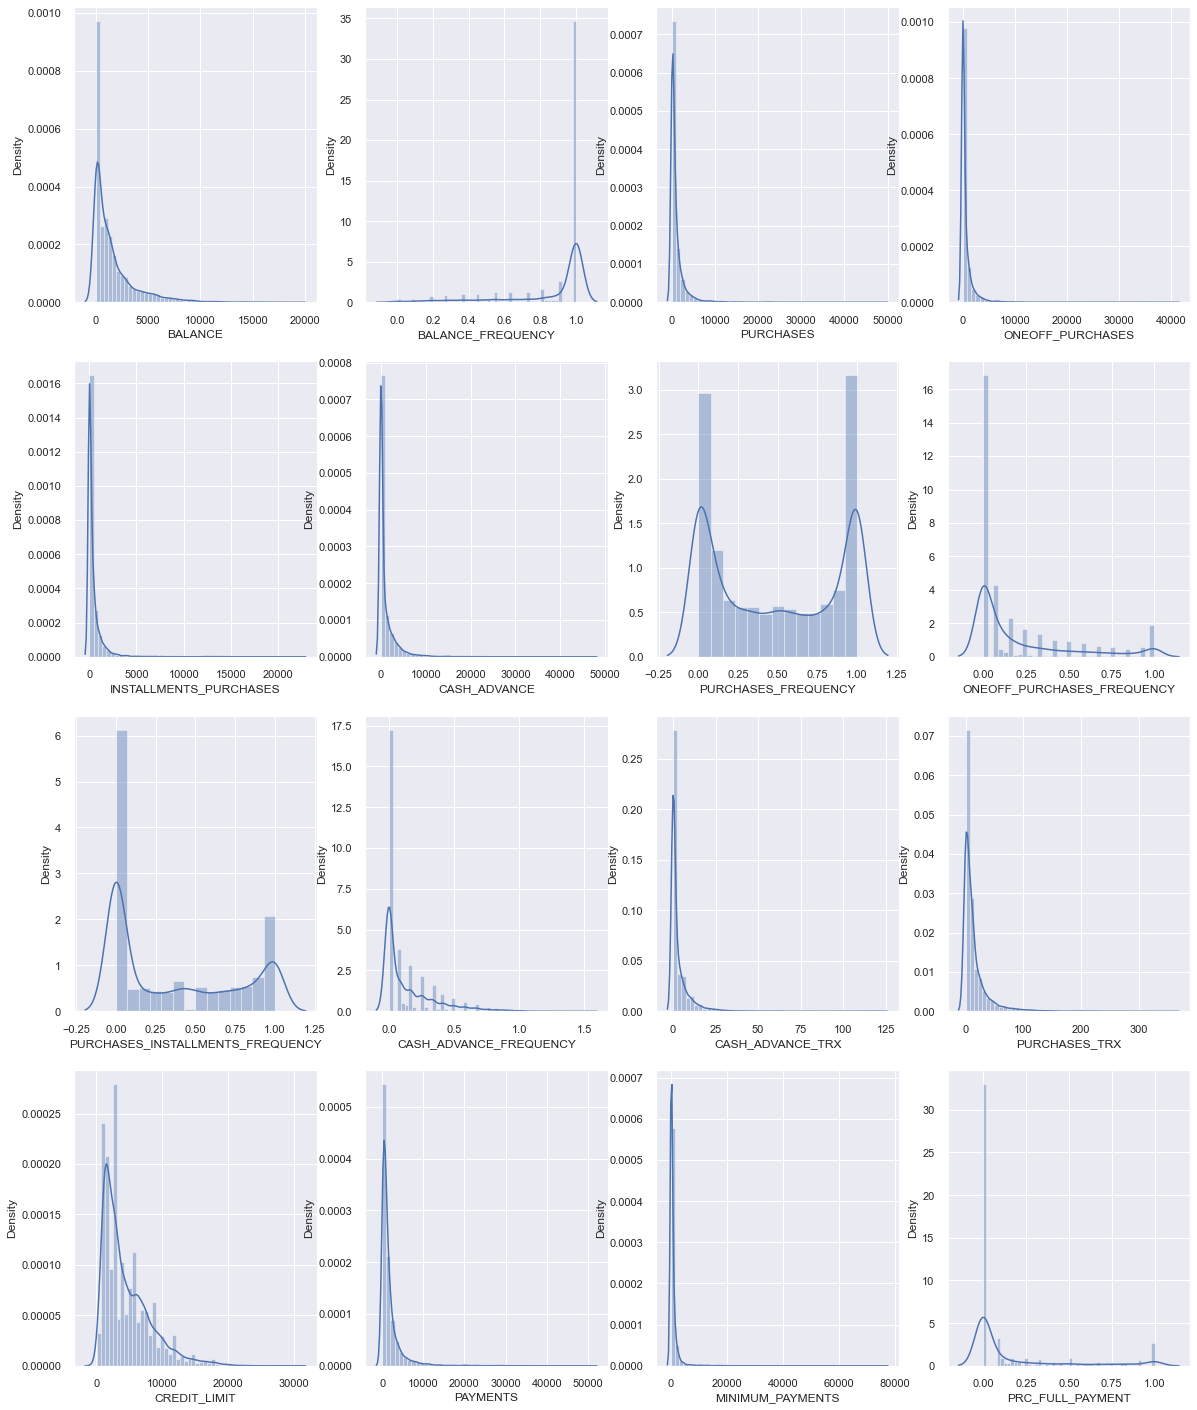

In [11]:
# Melihat kembali distribusi normal dataset
plt.figure(figsize = (20, 25))
feature_num = 1
for i in df1:
    if feature_num < 17:
        ax = plt.subplot(4, 4, feature_num)
        sns.distplot(df1[i])
        plt.xlabel(i, fontsize = 12)
        
    feature_num += 1
plt.show()

In [12]:
summary_table(df1)

,dataFeatures,dataType,null,null_percentage,unique,uniqueSample,unique_percentage
0,BALANCE,float64,0,0.0,8871,"[3380.9902369999995, 600.450838, 2302.479845]",99.12
1,BALANCE_FREQUENCY,float64,0,0.0,43,"[0.545455, 0.818182, 1.0]",0.48
2,PURCHASES,float64,0,0.0,6203,"[193.4, 0.0]",69.31
3,ONEOFF_PURCHASES,float64,0,0.0,4014,"[0.0, 96.0]",44.85
4,INSTALLMENTS_PURCHASES,float64,0,0.0,4452,[0.0],49.74
5,CASH_ADVANCE,float64,0,0.0,4323,"[1916.483068, 389.261392, 0.0]",48.30
6,PURCHASES_FREQUENCY,float64,0,0.0,47,[0.0],0.53
7,ONEOFF_PURCHASES_FREQUENCY,float64,0,0.0,47,"[0.0, 0.833333, 0.083333]",0.53
8,PURCHASES_INSTALLMENTS_FREQUENCY,float64,0,0.0,47,"[0.0, 0.333333]",0.53
9,CASH_ADVANCE_FREQUENCY,float64,0,0.0,54,"[0.166667, 0.0]",0.60


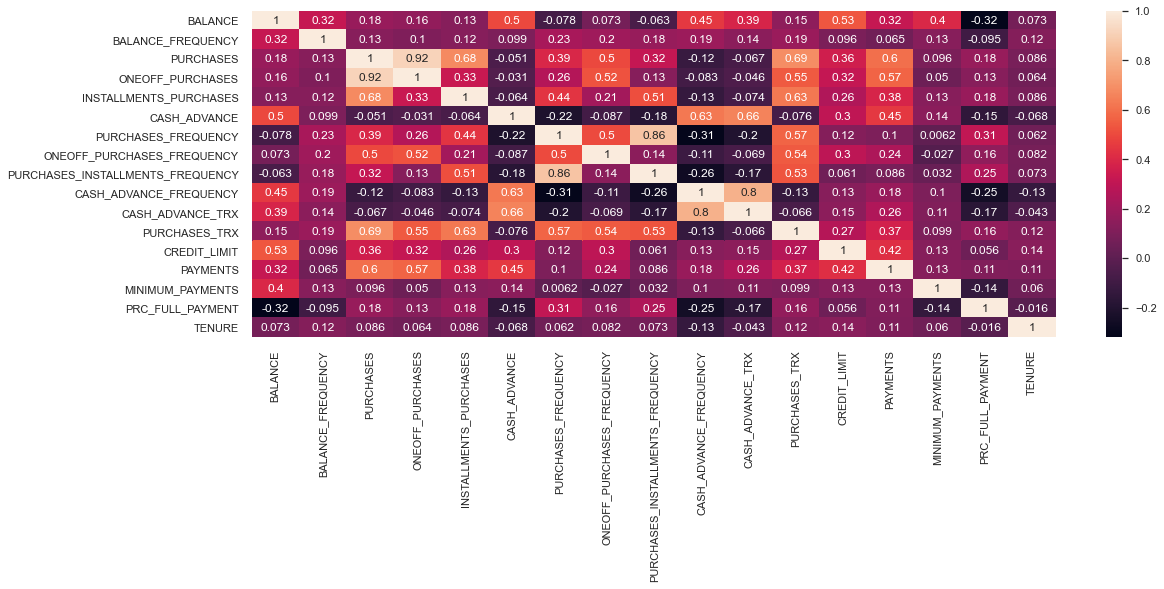

In [13]:
plt.figure(figsize=(18,6))
df_corr = df1.corr()
sns.heatmap(df_corr, annot = True)

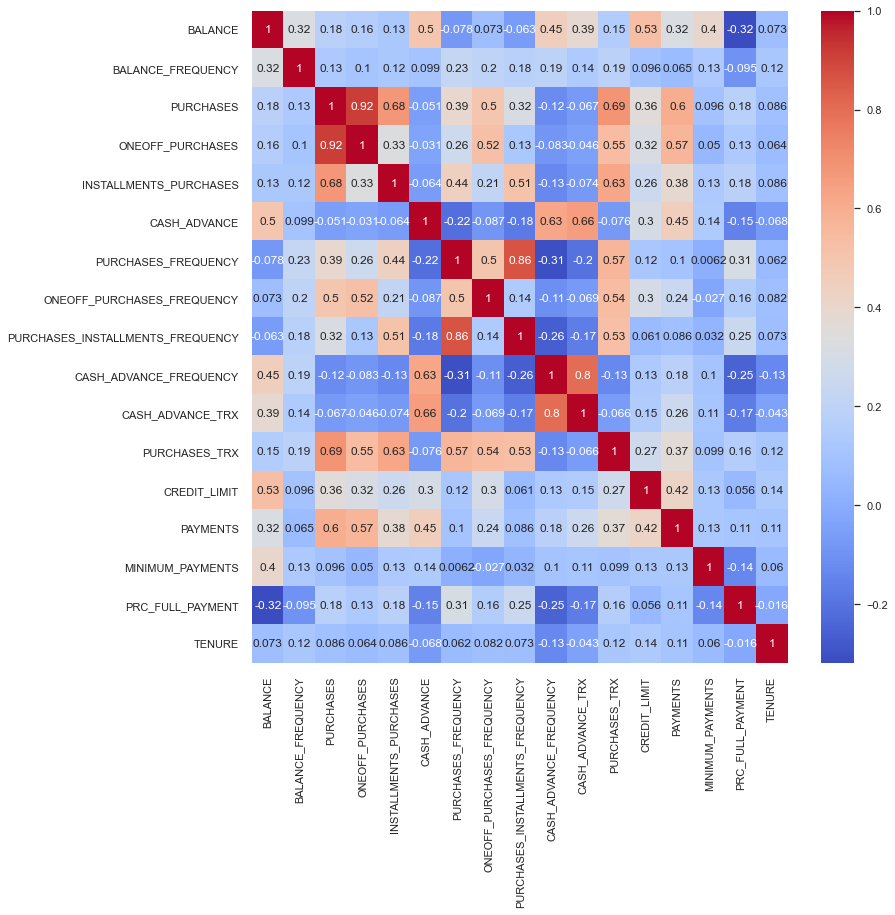

In [14]:
plt.figure(figsize=(12,12))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')

In [15]:
df1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,299.351881,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [16]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
# Calculating Hopkins score to know whether the data is good for clustering or not.

def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    HS = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(HS):
        print(ujd, wjd)
        HS = 0
 
    return HS

In [17]:
# Hopkins score
Hopkins_score=round(hopkins(df1),2)
Hopkins_score

0.98

Dari hopkins score ini bisa dikatakan bahwa dataset ini baik untuk dibuat clustering

In [18]:
# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [19]:
# Putting feature variable to X
X = df1

# Putting COUNTRY
Cust_ID = df['CUST_ID']

In [20]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

In [21]:
#Doing the PCA on the train data
pca.fit(X)

PCA(random_state=42)

In [22]:
pca.components_

array([[ 2.91670078e-01,  8.43854881e-06,  2.92579293e-01,
         2.10731084e-01,  8.18426228e-02,  2.16269677e-01,
         1.29665789e-05,  2.27348613e-05,  8.45908056e-06,
         1.02227691e-05,  4.04802479e-04,  2.34088953e-03,
         6.89749816e-01,  4.87321792e-01,  1.34924280e-01,
         2.31319989e-06,  3.93411787e-05],
       [-3.00704445e-01, -4.47092648e-06,  5.01302071e-01,
         3.80728528e-01,  1.20613424e-01, -2.04615309e-01,
         3.70737081e-05,  2.84231059e-05,  3.02164187e-05,
        -1.94058771e-05, -5.04560410e-04,  3.51904733e-03,
        -4.47346412e-01,  4.70301139e-01, -1.88651054e-01,
         2.56215402e-05,  3.02437565e-06],
       [ 2.75524150e-01,  1.14945972e-05, -9.69587156e-02,
        -7.79738715e-02, -1.90121469e-02,  4.00110537e-01,
        -3.08263164e-05, -2.82695501e-05, -1.72570066e-05,
         2.87402004e-05,  9.97481728e-04, -9.71247932e-04,
        -5.07097434e-01,  2.94333379e-01,  6.35903872e-01,
        -2.74079965e-05, -2.6

In [23]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df

,PC1,PC2,Feature
0,0.291670,-0.300704,BALANCE
1,0.000008,-0.000004,BALANCE_FREQUENCY
2,0.292579,0.501302,PURCHASES
3,0.210731,0.380729,ONEOFF_PURCHASES
4,0.081843,0.120613,INSTALLMENTS_PURCHASES
5,0.216270,-0.204615,CASH_ADVANCE
6,0.000013,0.000037,PURCHASES_FREQUENCY
7,0.000023,0.000028,ONEOFF_PURCHASES_FREQUENCY
8,0.000008,0.000030,PURCHASES_INSTALLMENTS_FREQUENCY
9,0.000010,-0.000019,CASH_ADVANCE_FREQUENCY


In [24]:
#Eigenvalue
pca.explained_variance_

array([2.08865623e+07, 7.80615993e+06, 6.15307122e+06, 4.98593957e+06,
       2.11290181e+06, 1.19503970e+06, 7.93329642e+05, 2.91712308e+02,
       3.16253134e+01, 2.58238931e+01, 1.68610701e+00, 1.84040934e-01,
       6.51372917e-02, 6.27515680e-02, 4.13930961e-02, 1.14390706e-02,
       6.66328419e-03])

In [25]:
#Proportion
pca.explained_variance_ratio_

array([4.75414684e-01, 1.77681852e-01, 1.40054662e-01, 1.13488704e-01,
       4.80933404e-02, 2.72011934e-02, 1.80575701e-02, 6.63988228e-06,
       7.19847440e-07, 5.87796968e-07, 3.83787442e-08, 4.18909351e-09,
       1.48263867e-09, 1.42833543e-09, 9.42179256e-10, 2.60373252e-10,
       1.51668001e-10])

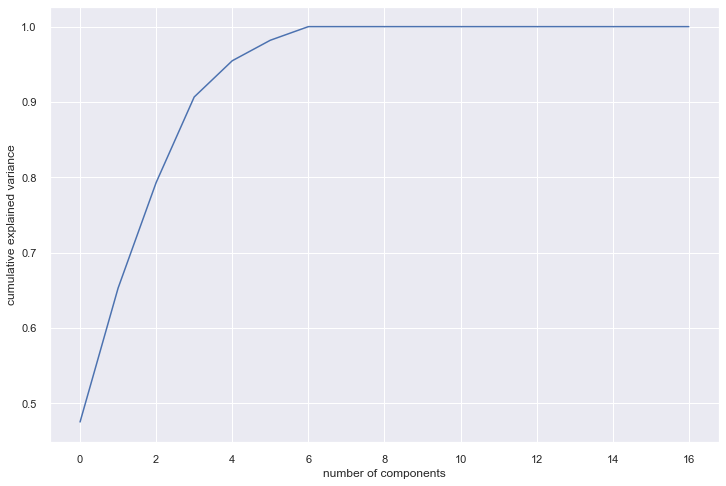

In [26]:
# plotting the cumulative variance against the number of components
plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.savefig('pca_no')
plt.show()

In [28]:
pca_final= PCA(n_components=5,random_state=42)

In [29]:
df_pca = pca_final.fit_transform(X)

In [30]:
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1,2,3,4
0,-4323.947888,915.629509,201.727694,-152.377829,56.196241
1,4121.392348,-2438.037482,2360.643837,-3923.727118,52.045591
2,1499.321549,-2001.829697,-2108.523843,1052.898115,-303.739549
3,1320.084521,-1385.338776,-2773.040071,1255.599678,-485.540510
4,-3740.664087,751.599562,529.813139,-227.228414,-227.341955


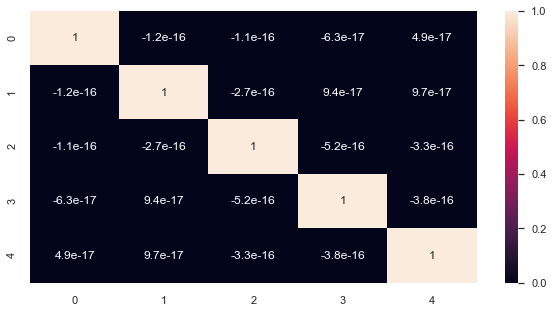

In [31]:
#plotting the correlation matrix
plt.figure(figsize = (10,5))
sns.heatmap(df_pca.corr(),annot = True)

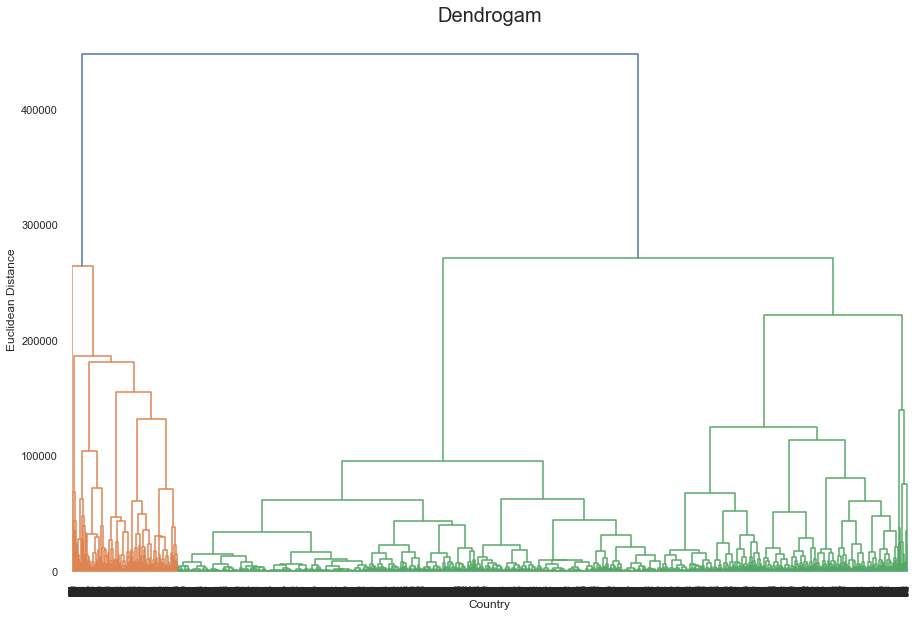

In [32]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,10))
dendrogram = sch.dendrogram(sch.linkage(df_pca, method = 'ward',metric='euclidean'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Country')
plt.ylabel('Euclidean Distance')
plt.show()

In [41]:
#Modeling Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
cluster_hc_pca = hc.fit_predict(df_pca)

In [42]:
#Add cluster result to Dataframe
df_pca['cluster']=cluster_hc_pca

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


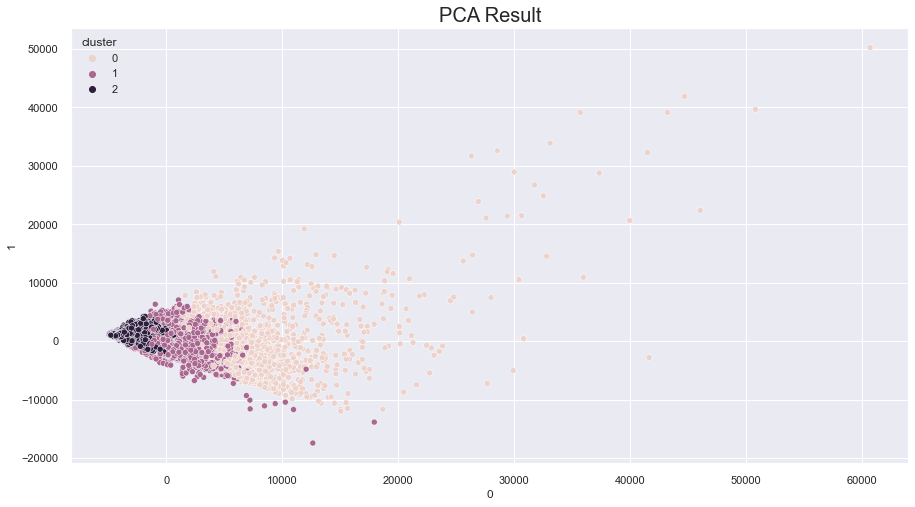

In [43]:
plt.figure(figsize=(15,8))
sns.scatterplot(df_pca.iloc[:,0],df_pca.iloc[:,1],hue=df_pca['cluster'])
plt.title('PCA Result', fontsize = 20)
plt.show()

In [44]:
#Merge Country and Cluster
pca_cluster_hc = pd.concat([df['CUST_ID'],df_pca['cluster']], axis=1, join='outer')
pca_cluster_hc.sample(5)

,CUST_ID,cluster
8048,C18266,2
8651,C18887,2
6635,C16818,1
8848,C19089,2
1054,C11089,0


In [45]:
#Merge to Original Data
clustered_data_hc_pca = pca_cluster_hc.merge(df, on = 'CUST_ID')
clustered_data_hc_pca.sample(5)

,CUST_ID,cluster,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
996,C11030,2,9.503968,1.000000,96.62,0.00,96.62,0.000000,1.000000,0.000000,1.0,0.00,0,19,4500.0,1086.932525,92.217936,0.250000,12
586,C10610,2,0.327199,0.454545,24.64,24.64,0.00,0.000000,0.083333,0.083333,0.0,0.00,0,1,1800.0,45.640106,26.849523,0.000000,12
2810,C12892,1,2414.435780,1.000000,689.40,689.40,0.00,1156.608975,1.000000,1.000000,0.0,0.25,3,12,8500.0,1582.886402,610.758681,0.000000,12
4553,C14679,0,337.178513,1.000000,3809.71,3809.71,0.00,0.000000,1.000000,1.000000,0.0,0.00,0,16,16500.0,2837.599645,238.075524,0.916667,12
3515,C13615,2,73.353928,0.400000,0.00,0.00,0.00,380.852744,0.000000,0.000000,0.0,0.10,2,0,1200.0,1035.473514,84.740732,0.500000,10


In [46]:
cluster_0 = clustered_data_hc_pca[clustered_data_hc_pca['cluster'] == 0]
cluster_0

,CUST_ID,cluster,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1,C10002,0,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
6,C10007,0,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
18,C10019,0,1989.072228,1.000000,504.35,166.00,338.35,0.000000,0.666667,0.083333,0.583333,0.000000,0,9,13000.0,1720.837373,744.613395,0.000000,12
21,C10022,0,6369.531318,1.000000,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.000000,0.333333,6,92,11250.0,2077.959051,1659.775075,0.000000,12
23,C10024,0,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.000000,0.083333,0.916667,0.333333,13,13,9000.0,9479.043842,1425.426525,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8705,C18942,0,7302.672686,1.000000,0.00,0.00,0.00,10762.707760,0.000000,0.000000,0.000000,0.750000,19,0,9000.0,3824.308564,2214.506825,0.000000,12
8737,C18975,0,2533.618119,0.909091,5633.83,2985.92,2647.91,2451.807788,0.916667,0.500000,0.750000,0.333333,16,82,9000.0,8176.953944,602.963244,0.000000,12
8743,C18982,0,40.960739,0.181818,472.75,431.37,41.38,0.000000,0.181818,0.181818,0.090909,0.000000,0,7,13000.0,0.000000,299.351881,0.000000,11
8748,C18987,0,1042.816735,0.625000,3950.00,3950.00,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0,3,3150.0,6274.982741,303.462882,0.000000,8


In [47]:
cluster_1 = clustered_data_hc_pca[clustered_data_hc_pca['cluster'] == 1]
cluster_1

,CUST_ID,cluster,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2,C10003,1,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,299.351881,0.000000,12
8,C10009,1,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,1,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12
13,C10014,1,921.693369,1.000000,2137.93,419.96,1717.97,0.000000,0.750000,0.166667,0.750000,0.000000,0,26,7500.0,1655.891435,251.137986,0.083333,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8839,C19080,1,3271.424058,0.888889,1173.28,0.00,1173.28,4122.912645,0.888889,0.000000,0.777778,0.333333,4,16,5000.0,817.177789,999.725550,0.000000,9
8840,C19081,1,2588.410789,0.888889,787.40,0.00,787.40,3762.650329,0.777778,0.000000,0.666667,0.555556,10,17,3000.0,1739.406636,1769.001229,0.000000,9
8881,C19122,1,2150.940844,1.000000,1105.74,0.00,1105.74,2220.336732,1.000000,0.000000,0.857143,0.142857,7,13,2500.0,631.429223,2825.419309,0.000000,7
8914,C19155,1,181.891981,0.500000,0.00,0.00,0.00,1865.191764,0.000000,0.000000,0.000000,0.500000,10,0,2000.0,4565.356495,88.057892,1.000000,6


In [48]:
cluster_2 = clustered_data_hc_pca[clustered_data_hc_pca['cluster'] == 2]
cluster_2

,CUST_ID,cluster,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,2,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.00,12
4,C10005,2,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.00,12
5,C10006,2,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.00,12
7,C10008,2,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.00,12
10,C10011,2,1293.124939,1.000000,920.12,0.00,920.12,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1200.0,1083.301007,2172.697765,0.00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,2,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,2,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,299.351881,0.00,6
8947,C19188,2,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,2,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6


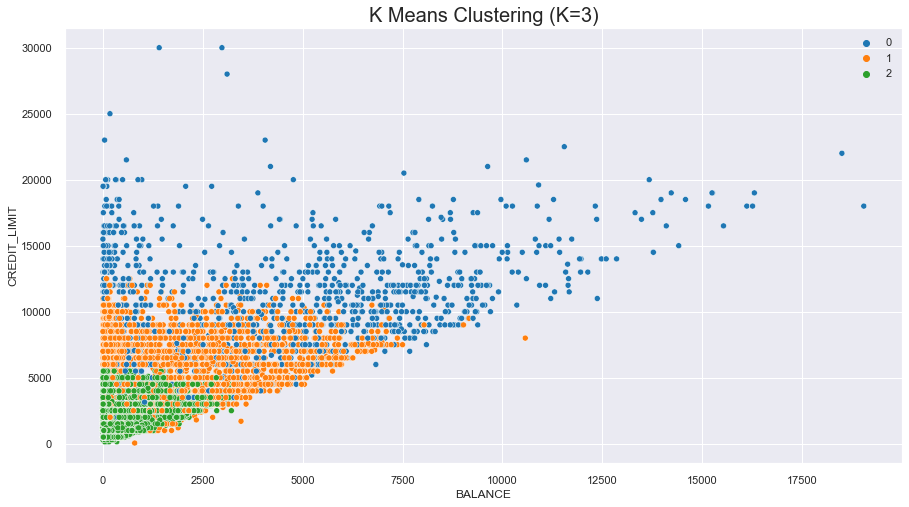

In [50]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=clustered_data_hc_pca, x='BALANCE',y='CREDIT_LIMIT', hue='cluster', palette='tab10')
plt.title('K Means Clustering (K=3)', fontsize = 20)
plt.legend()
plt.show()

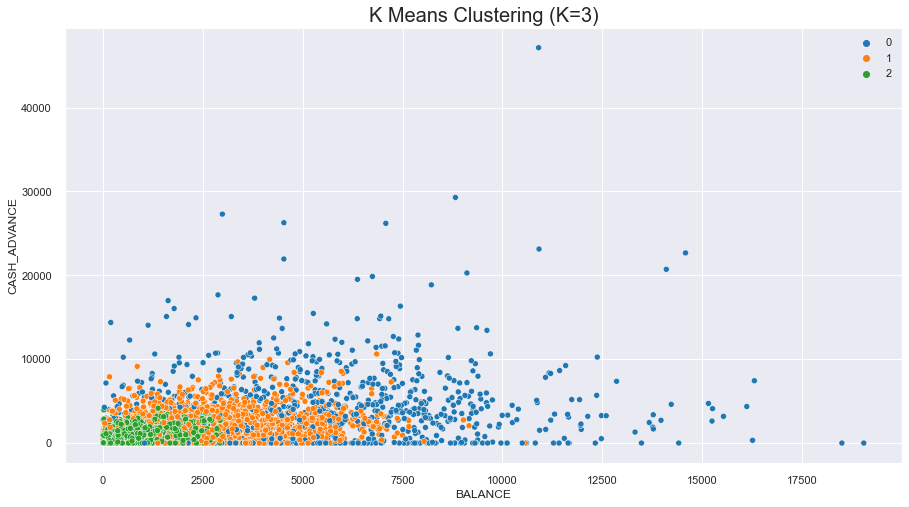

In [51]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=clustered_data_hc_pca, x='BALANCE',y='CASH_ADVANCE', hue='cluster', palette='tab10')
plt.title('K Means Clustering (K=3)', fontsize = 20)
plt.legend()
plt.show()

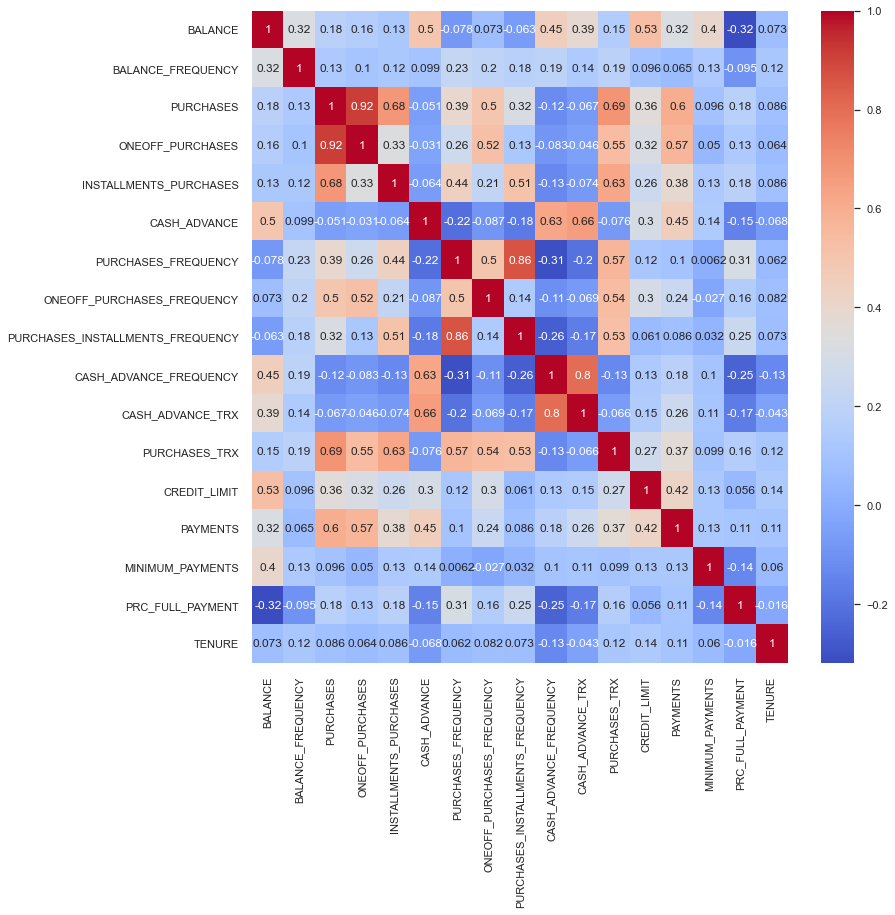

In [52]:
plt.figure(figsize=(12,12))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')

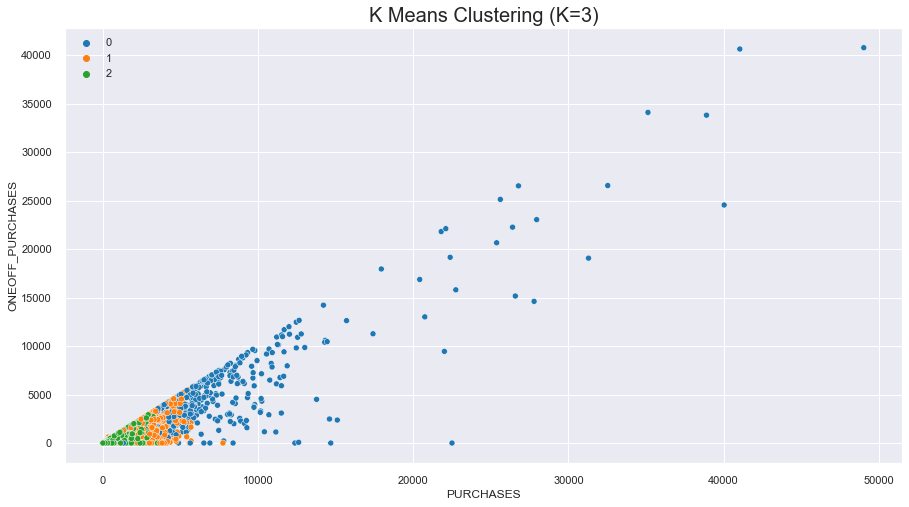

In [53]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=clustered_data_hc_pca, x='PURCHASES',y='ONEOFF_PURCHASES', hue='cluster', palette='tab10')
plt.title('K Means Clustering (K=3)', fontsize = 20)
plt.legend()
plt.show()